Classifiaction d'informations RH 
Notre projet vise à analyser les données employé afin de classifier les profils en succeptible au turn-over.
L'objectif est de prédire si un employé est succeptible de démissionner.
C'est une tâche de ML supervisée aka Classification binaire.

In [381]:
# importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

In [382]:
# acquisition/importation des données 
extraits_eval = pd.read_csv('../Datasets/extrait_eval.csv', sep=',')
extraits_sirh = pd.read_csv('../Datasets/extrait_sirh.csv', sep=',')
extrait_sondage = pd.read_csv('../Datasets/extrait_sondage.csv', sep=',')



# Inspection des données 

 --- inspection de la table extraits_eval --- 

In [383]:
# dimension  extraits_eval
extraits_eval.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [384]:
# informations 
extraits_eval.describe(include="object", exclude="number").T

,count,unique,top,freq
eval_number,1470,1470,E_1,1
heure_supplementaires,1470,2,Non,1054
augementation_salaire_precedente,1470,15,11 %,210


In [385]:
# informations 
extraits_eval.describe(exclude="object").T['mean']

satisfaction_employee_environnement          2.721769
note_evaluation_precedente                   2.729932
niveau_hierarchique_poste                    2.063946
satisfaction_employee_nature_travail         2.728571
satisfaction_employee_equipe                 2.712245
satisfaction_employee_equilibre_pro_perso    2.761224
note_evaluation_actuelle                     3.153741
Name: mean, dtype: float64

In [386]:
# recherche de données manquantes 
#print(extraits_eval.isnull().mean())
if (extraits_eval.isnull().mean().sum() == 0):
    print("Il n'y a pas de données manquantes dans le jeu de données extraits_eval")

Il n'y a pas de données manquantes dans le jeu de données extraits_eval


 --- inspection de la table sirh --- 

In [387]:
# informations 
extraits_sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [388]:
# valeurs uniques des colonnes catégorielles
extraits_sirh.describe(include='object').T

    

,count,unique,top,freq
genre,1470,2,M,882
statut_marital,1470,3,Marié(e),673
departement,1470,3,Consulting,961
poste,1470,9,Cadre Commercial,326


In [389]:
# recherche des données manquantes
#print(extraits_sirh.isnull().mean())
if (extraits_sirh.isnull().mean().sum() == 0):
    print("Il n'y a pas de données manquantes dans le jeu de données extraits_sirh")

Il n'y a pas de données manquantes dans le jeu de données extraits_sirh


 --- inspection de la table extrait_sondage --- 

In [390]:
# informations 
extrait_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

In [391]:
# description des colonnes catégorielles
extrait_sondage.describe(include='object').T    

,count,unique,top,freq
a_quitte_l_entreprise,1470,2,Non,1233
domaine_etude,1470,6,Infra & Cloud,606
ayant_enfants,1470,1,Y,1470
frequence_deplacement,1470,3,Occasionnel,1043


In [392]:
# description des colonnes numériques
extrait_sondage.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
nombre_participation_pee,1470.0,0.793878,0.852077,0.0,0.00,1.0,1.00,3.0
nb_formations_suivies,1470.0,2.799320,1.289271,0.0,2.00,3.0,3.00,6.0
nombre_employee_sous_responsabilite,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
code_sondage,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
distance_domicile_travail,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
niveau_education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
annees_depuis_la_derniere_promotion,1470.0,2.187755,3.222430,0.0,0.00,1.0,3.00,15.0
annes_sous_responsable_actuel,1470.0,4.123129,3.568136,0.0,2.00,3.0,7.00,17.0


Il n'y a pas de données manquantes dans aucune des tables 

# ANALYSE EXPlORATOIRE  (EDA) 

In [401]:
# conversion des variables extraits_eval en type catégoriel
for col in extraits_eval.columns:
    if col != 'eval_number':
        extraits_eval[col] = extraits_eval[col].astype('category')

In [394]:
#extraits_eval.dtypes

In [402]:
# fonction pour EDA 
def analyse_variable(variable):
    print("-"*10, "Analyse de la variable :", variable.name, "-"*10)
    print("Type de la variable :", variable.dtypes)
    print("Nombre de valeurs uniques :", variable.nunique())
    print("Valeurs uniques :", variable.unique())
    print("Statistiques descriptives :")
    print(variable.describe())
    print("Distribution des valeurs :")
    plt.figure(figsize=(10, 6))
    if (variable.dtypes == 'int64' and variable.nunique() > 15) :
        sns.displot(variable, bins=30)
        plt.title(f'Distribution de la variable {variable.name}')
        #plt.show()
    else:
        variable = variable.astype('category')
        sns.countplot(x=variable, 
                    order=variable.value_counts().index, 
                    hue=variable,
                    stat='proportion')
        plt.title(f'Distribution par ordre décroissant \n  \
            des proportions de la variable {variable.name}')
    plt.show()  
    print("\n")

---------- Analyse de la variable : satisfaction_employee_environnement ----------
Type de la variable : category
Nombre de valeurs uniques : 4
Valeurs uniques : [2, 3, 4, 1]
Categories (4, int64): [1, 2, 3, 4]
Statistiques descriptives :
count     1470
unique       4
top          3
freq       453
Name: satisfaction_employee_environnement, dtype: int64
Distribution des valeurs :


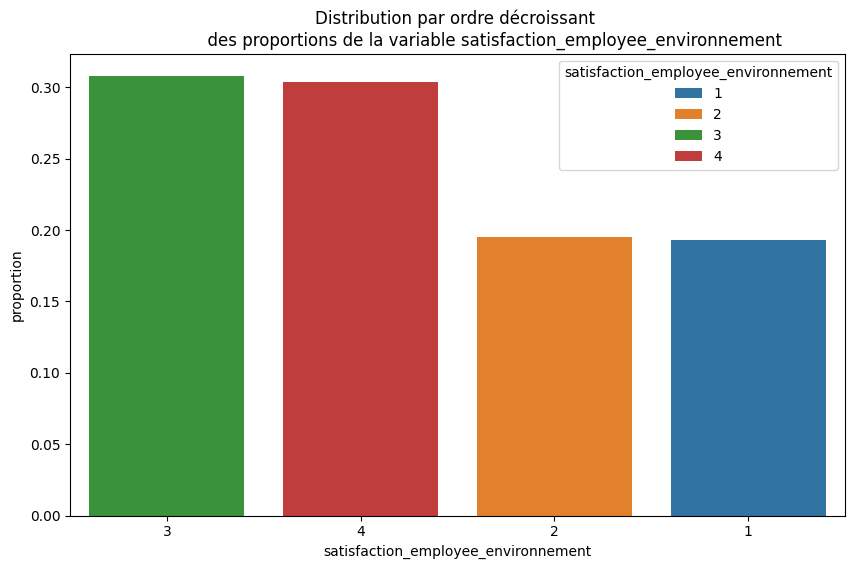



---------- Analyse de la variable : note_evaluation_precedente ----------
Type de la variable : category
Nombre de valeurs uniques : 4
Valeurs uniques : [3, 2, 4, 1]
Categories (4, int64): [1, 2, 3, 4]
Statistiques descriptives :
count     1470
unique       4
top          3
freq       868
Name: note_evaluation_precedente, dtype: int64
Distribution des valeurs :


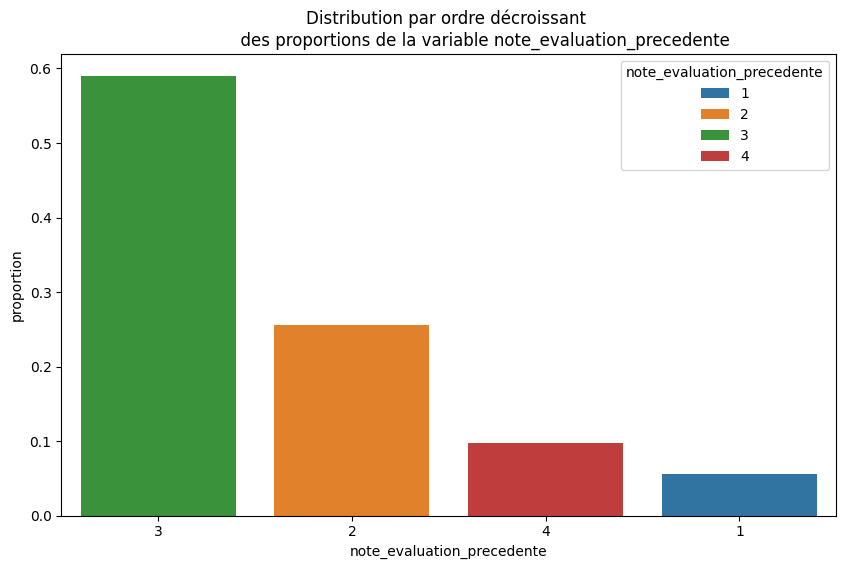



---------- Analyse de la variable : niveau_hierarchique_poste ----------
Type de la variable : category
Nombre de valeurs uniques : 5
Valeurs uniques : [2, 1, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
Statistiques descriptives :
count     1470
unique       5
top          1
freq       543
Name: niveau_hierarchique_poste, dtype: int64
Distribution des valeurs :


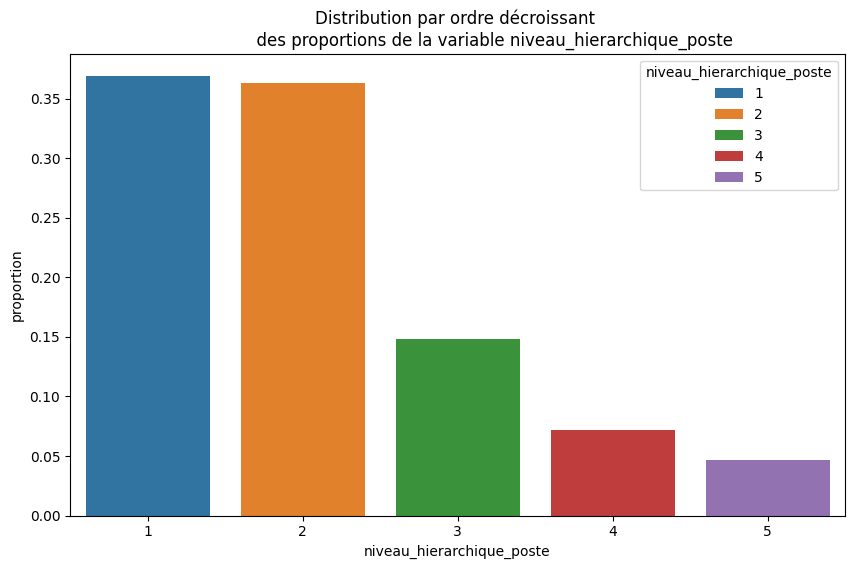



---------- Analyse de la variable : satisfaction_employee_nature_travail ----------
Type de la variable : category
Nombre de valeurs uniques : 4
Valeurs uniques : [4, 2, 3, 1]
Categories (4, int64): [1, 2, 3, 4]
Statistiques descriptives :
count     1470
unique       4
top          4
freq       459
Name: satisfaction_employee_nature_travail, dtype: int64
Distribution des valeurs :


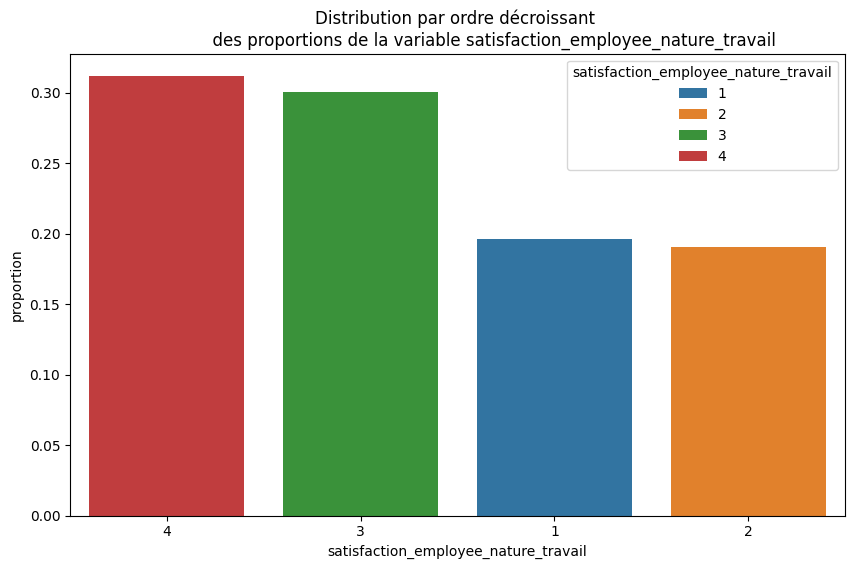



---------- Analyse de la variable : satisfaction_employee_equipe ----------
Type de la variable : category
Nombre de valeurs uniques : 4
Valeurs uniques : [1, 4, 2, 3]
Categories (4, int64): [1, 2, 3, 4]
Statistiques descriptives :
count     1470
unique       4
top          3
freq       459
Name: satisfaction_employee_equipe, dtype: int64
Distribution des valeurs :


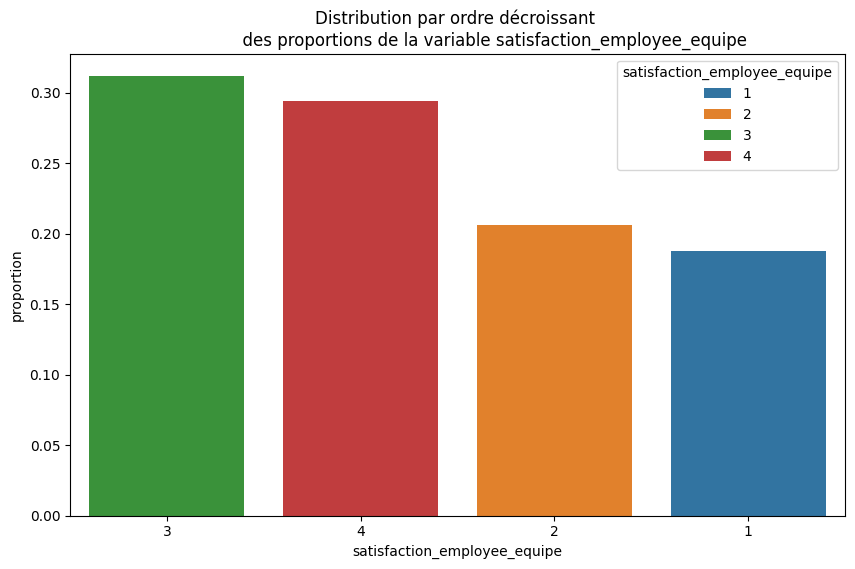



---------- Analyse de la variable : satisfaction_employee_equilibre_pro_perso ----------
Type de la variable : category
Nombre de valeurs uniques : 4
Valeurs uniques : [1, 3, 2, 4]
Categories (4, int64): [1, 2, 3, 4]
Statistiques descriptives :
count     1470
unique       4
top          3
freq       893
Name: satisfaction_employee_equilibre_pro_perso, dtype: int64
Distribution des valeurs :


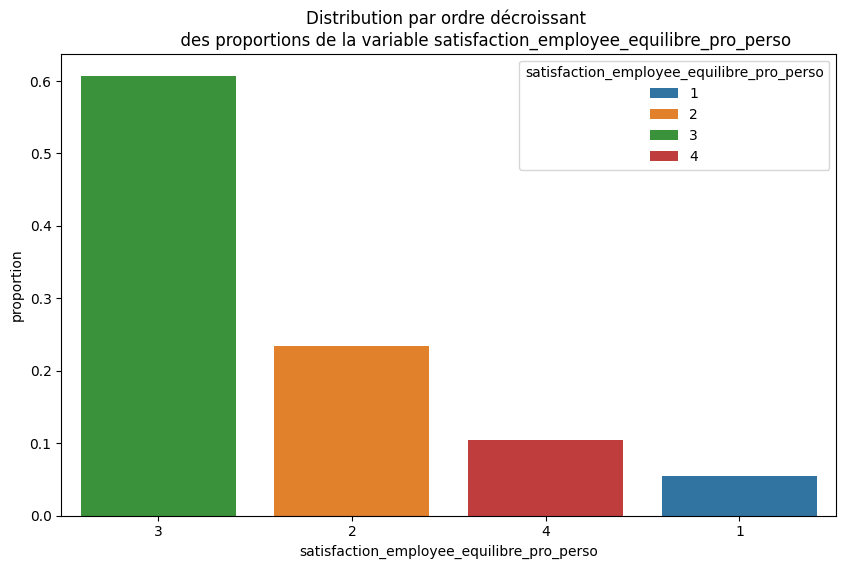



---------- Analyse de la variable : eval_number ----------
Type de la variable : category
Nombre de valeurs uniques : 1470
Valeurs uniques : ['E_1', 'E_2', 'E_4', 'E_5', 'E_7', ..., 'E_2061', 'E_2062', 'E_2064', 'E_2065', 'E_2068']
Length: 1470
Categories (1470, object): ['E_1', 'E_10', 'E_100', 'E_1001', ..., 'E_996', 'E_997', 'E_998', 'E_999']
Statistiques descriptives :
count     1470
unique    1470
top        E_1
freq         1
Name: eval_number, dtype: object
Distribution des valeurs :


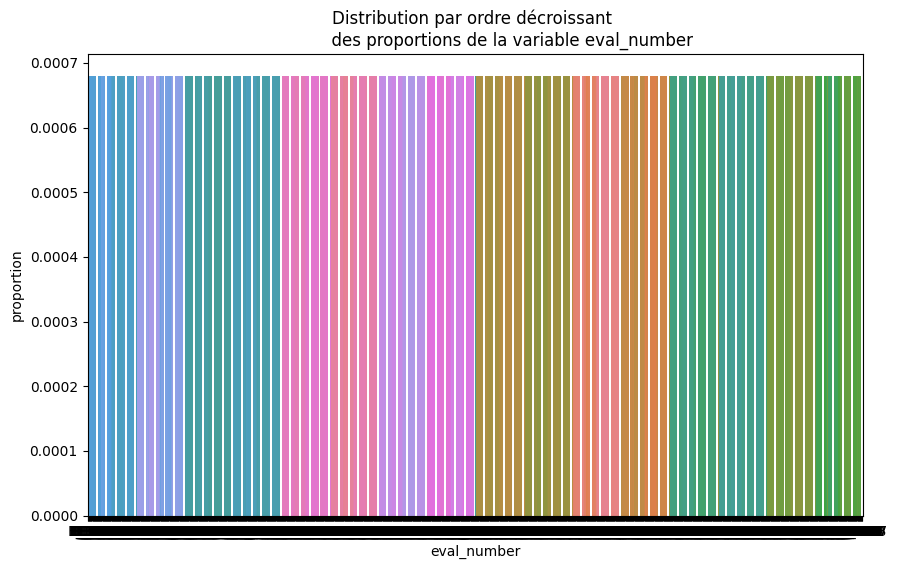



---------- Analyse de la variable : note_evaluation_actuelle ----------
Type de la variable : category
Nombre de valeurs uniques : 2
Valeurs uniques : [3, 4]
Categories (2, int64): [3, 4]
Statistiques descriptives :
count     1470
unique       2
top          3
freq      1244
Name: note_evaluation_actuelle, dtype: int64
Distribution des valeurs :


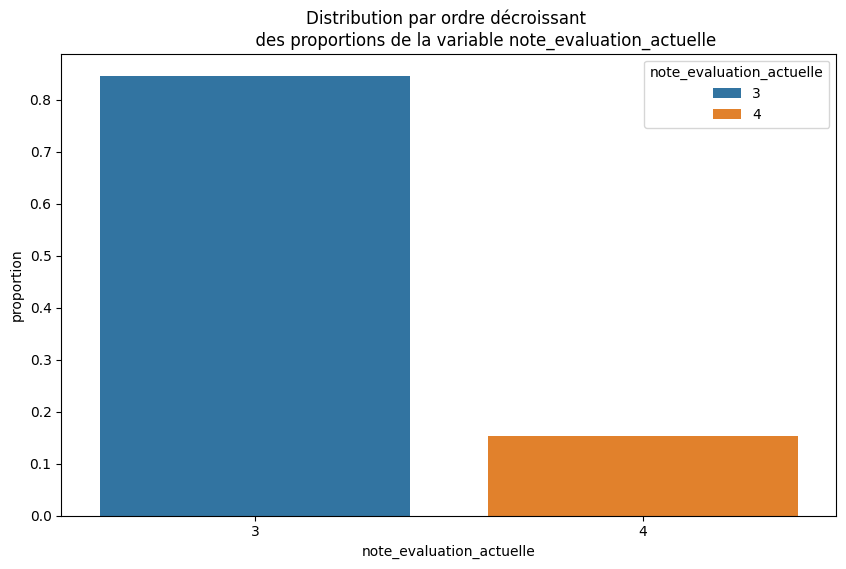



---------- Analyse de la variable : heure_supplementaires ----------
Type de la variable : category
Nombre de valeurs uniques : 2
Valeurs uniques : ['Oui', 'Non']
Categories (2, object): ['Non', 'Oui']
Statistiques descriptives :
count     1470
unique       2
top        Non
freq      1054
Name: heure_supplementaires, dtype: object
Distribution des valeurs :


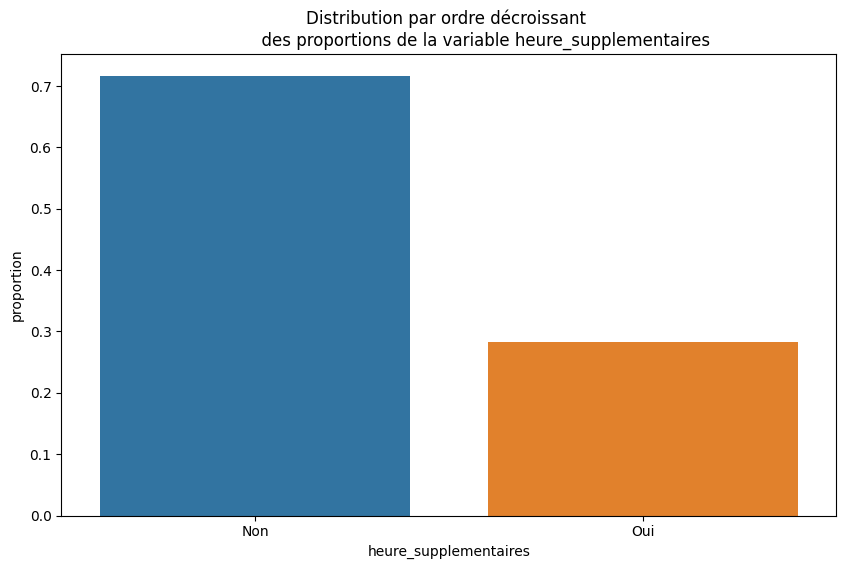



---------- Analyse de la variable : augementation_salaire_precedente ----------
Type de la variable : category
Nombre de valeurs uniques : 15
Valeurs uniques : ['11 %', '23 %', '15 %', '12 %', '13 %', ..., '16 %', '18 %', '19 %', '24 %', '25 %']
Length: 15
Categories (15, object): ['11 %', '12 %', '13 %', '14 %', ..., '22 %', '23 %', '24 %', '25 %']
Statistiques descriptives :
count     1470
unique      15
top       11 %
freq       210
Name: augementation_salaire_precedente, dtype: object
Distribution des valeurs :


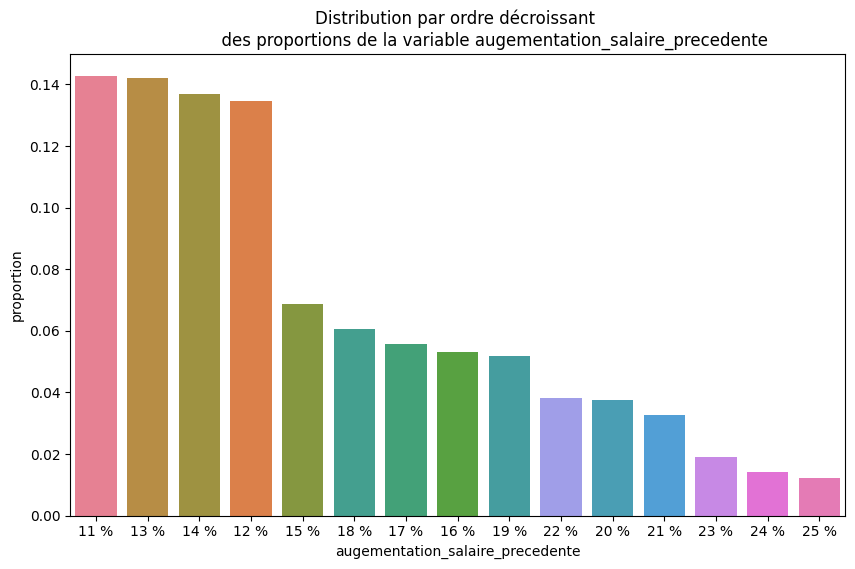

In [403]:
for col in extraits_eval.columns:
    #if col != 'eval_number':
    analyse_variable(extraits_eval[col])

In [397]:
# description extraits_sirh
extraits_sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


---------- Analyse de la variable : age ----------
Type de la variable : int64
Nombre de valeurs uniques : 43
Valeurs uniques : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Statistiques descriptives :
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64
Distribution des valeurs :


<Figure size 1000x600 with 0 Axes>

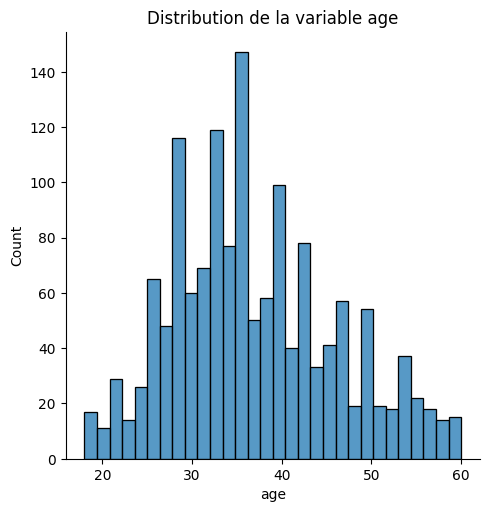



---------- Analyse de la variable : genre ----------
Type de la variable : object
Nombre de valeurs uniques : 2
Valeurs uniques : ['F' 'M']
Statistiques descriptives :
count     1470
unique       2
top          M
freq       882
Name: genre, dtype: object
Distribution des valeurs :


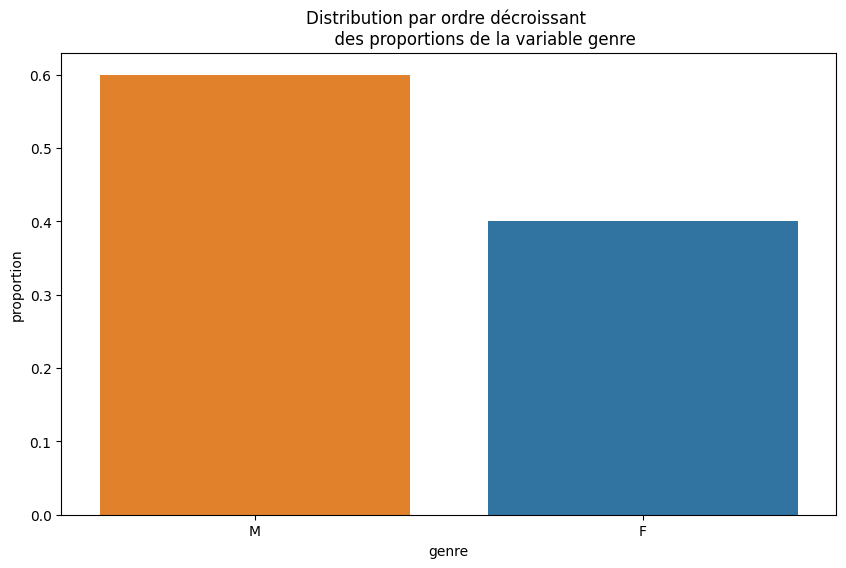



---------- Analyse de la variable : revenu_mensuel ----------
Type de la variable : int64
Nombre de valeurs uniques : 1349
Valeurs uniques : [5993 5130 2090 ... 9991 5390 4404]
Statistiques descriptives :
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: revenu_mensuel, dtype: float64
Distribution des valeurs :


<Figure size 1000x600 with 0 Axes>

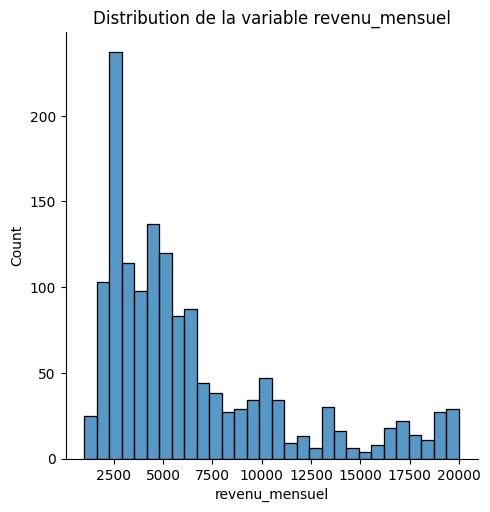



---------- Analyse de la variable : statut_marital ----------
Type de la variable : object
Nombre de valeurs uniques : 3
Valeurs uniques : ['Célibataire' 'Marié(e)' 'Divorcé(e)']
Statistiques descriptives :
count         1470
unique           3
top       Marié(e)
freq           673
Name: statut_marital, dtype: object
Distribution des valeurs :


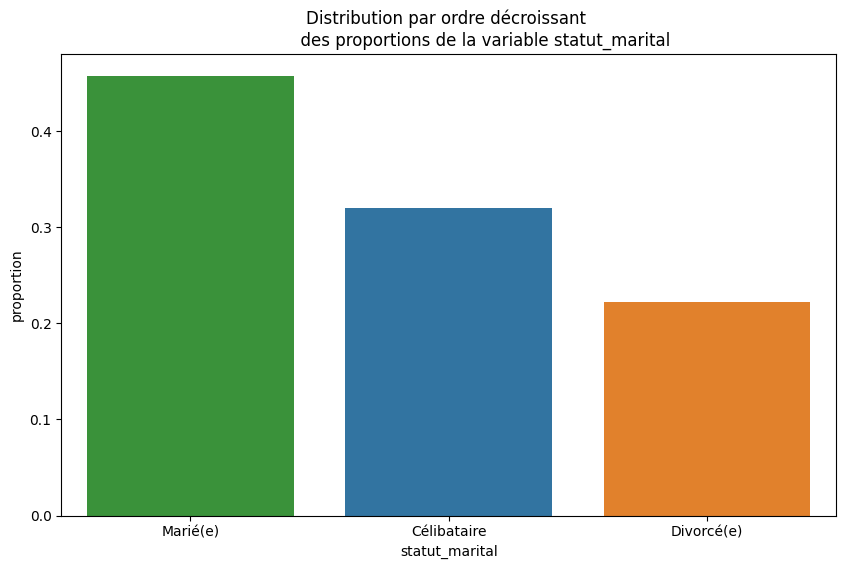



---------- Analyse de la variable : departement ----------
Type de la variable : object
Nombre de valeurs uniques : 3
Valeurs uniques : ['Commercial' 'Consulting' 'Ressources Humaines']
Statistiques descriptives :
count           1470
unique             3
top       Consulting
freq             961
Name: departement, dtype: object
Distribution des valeurs :


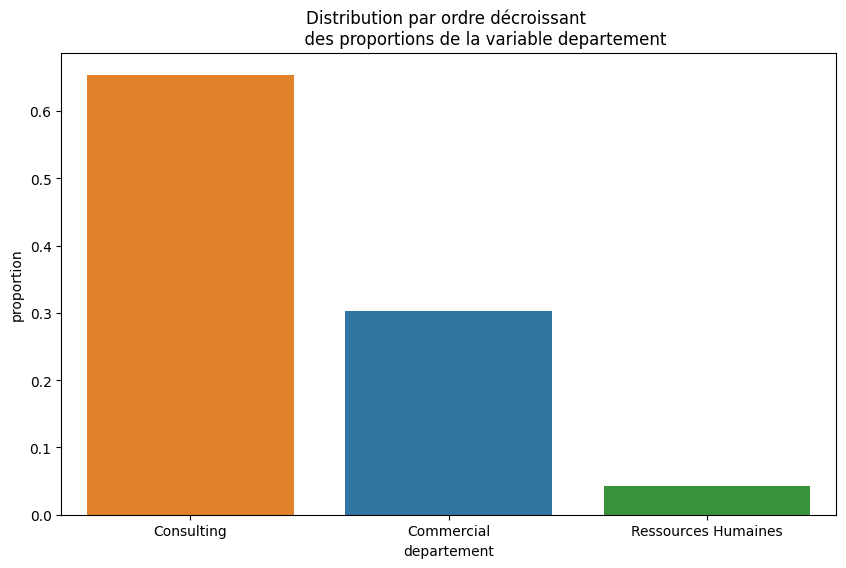



---------- Analyse de la variable : poste ----------
Type de la variable : object
Nombre de valeurs uniques : 9
Valeurs uniques : ['Cadre Commercial' 'Assistant de Direction' 'Consultant' 'Tech Lead'
 'Manager' 'Senior Manager' 'Représentant Commercial'
 'Directeur Technique' 'Ressources Humaines']
Statistiques descriptives :
count                 1470
unique                   9
top       Cadre Commercial
freq                   326
Name: poste, dtype: object
Distribution des valeurs :


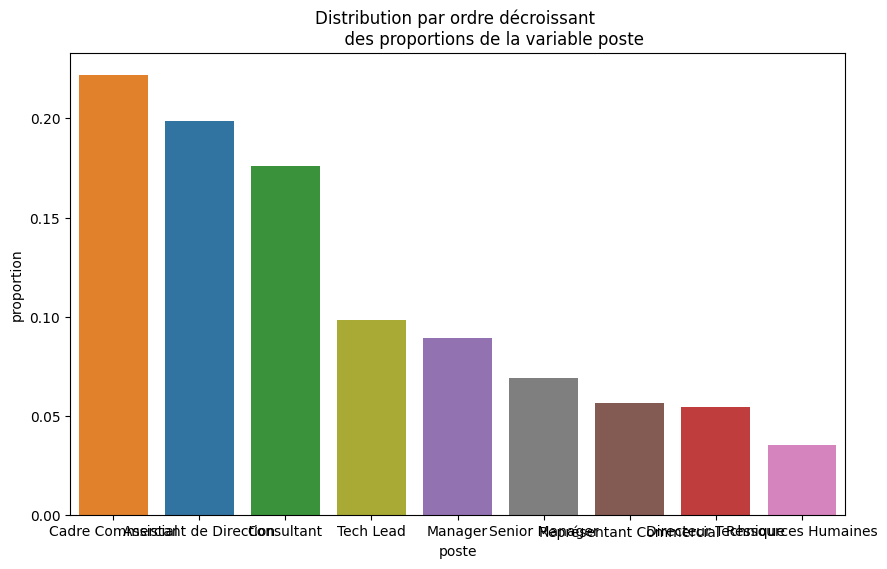



---------- Analyse de la variable : nombre_experiences_precedentes ----------
Type de la variable : int64
Nombre de valeurs uniques : 10
Valeurs uniques : [8 1 6 9 0 4 5 2 7 3]
Statistiques descriptives :
count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: nombre_experiences_precedentes, dtype: float64
Distribution des valeurs :


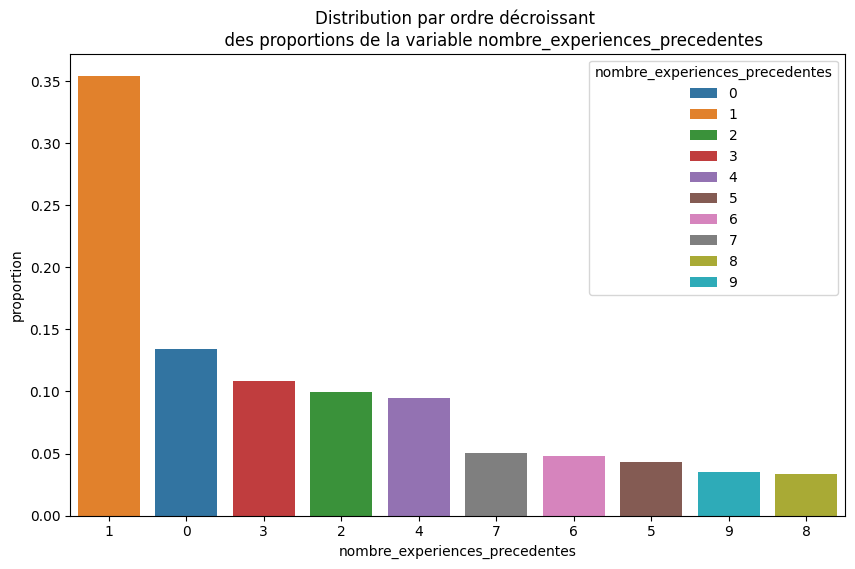



---------- Analyse de la variable : nombre_heures_travailless ----------
Type de la variable : int64
Nombre de valeurs uniques : 1
Valeurs uniques : [80]
Statistiques descriptives :
count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: nombre_heures_travailless, dtype: float64
Distribution des valeurs :


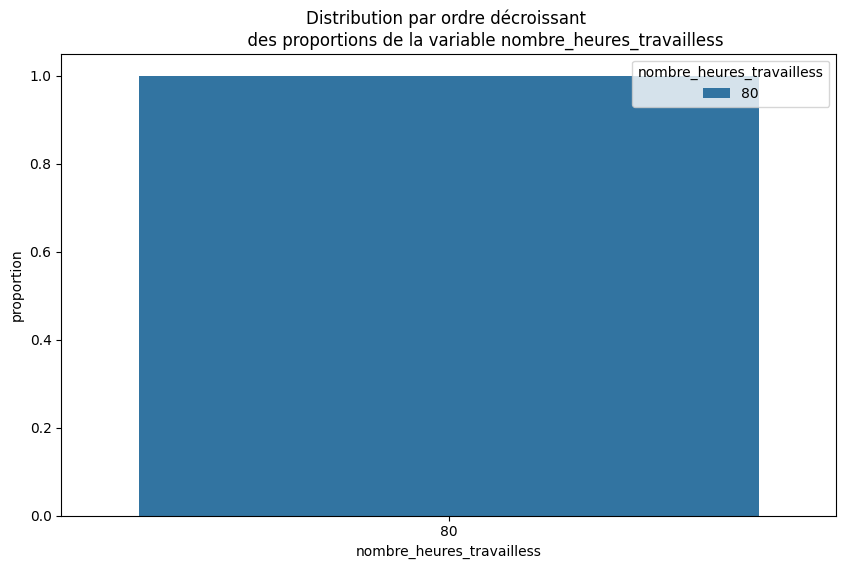



---------- Analyse de la variable : annee_experience_totale ----------
Type de la variable : int64
Nombre de valeurs uniques : 40
Valeurs uniques : [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
Statistiques descriptives :
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: annee_experience_totale, dtype: float64
Distribution des valeurs :


<Figure size 1000x600 with 0 Axes>

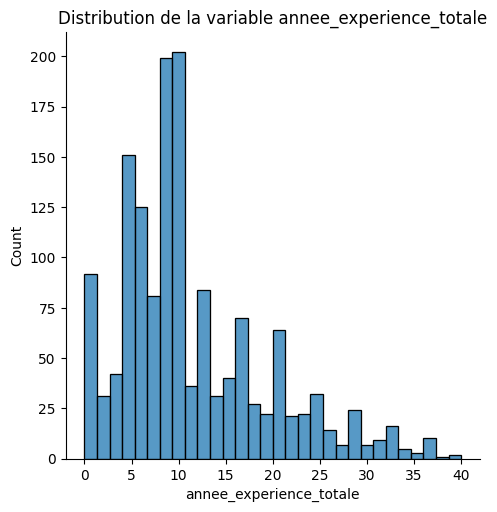



---------- Analyse de la variable : annees_dans_l_entreprise ----------
Type de la variable : int64
Nombre de valeurs uniques : 37
Valeurs uniques : [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
Statistiques descriptives :
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: annees_dans_l_entreprise, dtype: float64
Distribution des valeurs :


<Figure size 1000x600 with 0 Axes>

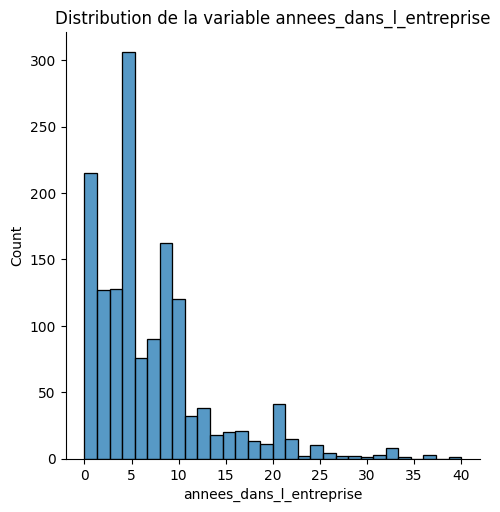



---------- Analyse de la variable : annees_dans_le_poste_actuel ----------
Type de la variable : int64
Nombre de valeurs uniques : 19
Valeurs uniques : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
Statistiques descriptives :
count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: annees_dans_le_poste_actuel, dtype: float64
Distribution des valeurs :


<Figure size 1000x600 with 0 Axes>

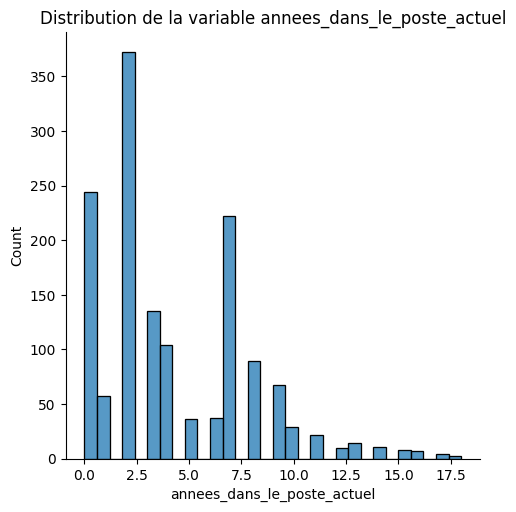

In [398]:
# EDA des variables de la table extraits_sirh
for col in extraits_sirh.columns:
    if col !='id_employee':
        analyse_variable(extraits_sirh[col])

In [414]:
# nombre de valeurs uniques dans la colonne 'eval_number'
if (extraits_eval['eval_number'].nunique() ==  extraits_eval.shape[0]):
    print("La colonne 'eval_number' est une clé primaire unique pour la table extraits_eval")

La colonne 'eval_number' est une clé primaire unique pour la table extraits_eval


In [413]:
# valuers unique dans la variable nombre_heures_travaillees
extraits_sirh['nombre_heures_travailless'].unique()

array([80])